In [ ]:
import pandas as pd

# Задание

**Цель: **
применить на практике методы по оценке качества данных.  
**Описание задания:**  
В домашней работе необходимо провести очистку данных на примере [датасета](hhttps://www.kaggle.com/hesh97/titanicdataset-traincsv) с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.
Этапы работы:

### 1. Загрузка данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/feml_data/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###  2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

#### нахождение и удаление пропусков

In [ ]:
# нахождение пропусков
cols  = data.columns
for i, el in enumerate(cols):
    print(f'{i, el} : {pd.isnull(data[el]).value_counts()}\n\n')

(0, 'PassengerId') : False    891
Name: PassengerId, dtype: int64


(1, 'Survived') : False    891
Name: Survived, dtype: int64


(2, 'Pclass') : False    891
Name: Pclass, dtype: int64


(3, 'Name') : False    891
Name: Name, dtype: int64


(4, 'Sex') : False    891
Name: Sex, dtype: int64


(5, 'Age') : False    714
True     177
Name: Age, dtype: int64


(6, 'SibSp') : False    891
Name: SibSp, dtype: int64


(7, 'Parch') : False    891
Name: Parch, dtype: int64


(8, 'Ticket') : False    891
Name: Ticket, dtype: int64


(9, 'Fare') : False    891
Name: Fare, dtype: int64


(10, 'Cabin') : True     687
False    204
Name: Cabin, dtype: int64


(11, 'Embarked') : False    889
True       2
Name: Embarked, dtype: int64




In [ ]:
# удаление пропусков
df = data.dropna(axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# замена данных в столбце 'Sex' male на 0, female на 1
df.Sex = df.Sex.replace('male', 0)
df.Sex = df.Sex.replace('female', 1)
df.Embarked = df.Embarked.replace('S', 0)
df.Embarked = df.Embarked.replace('C', 1)
df.Embarked = df.Embarked.replace('Q', 2)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,0
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0


In [ ]:
df['Sex'].unique()

array([1, 0])

In [ ]:
df['Embarked'].unique()

array([1, 0, 2])

In [ ]:
# отбор столбцов для обучения

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']


#### обучение модели



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42) # разделение на тестовую и тренировочную выборки

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
model.score(X_train, y_train)

0.773972602739726

In [ ]:
model.score(X_test, y_test)

0.7297297297297297

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, predictions)

0.6987577639751552

### 3. Снова загрузите полные данные.

4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [ ]:
titanic = data.copy()

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


удалим столбцы номер билета, номер каюты, имя, идентификатор пассажира, эта информация относится к порядковым данным и не должна оказывать влияния на целевую переменную (имя пассажира врядли коррелирует с его способностью выжить в катастрофе, как и номер билета или номер каюты)

In [ ]:
titanic = titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

осталось два столбца с пропусками

In [ ]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Проверьте данные на наличие пропущенных значений.



##### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# нахождение пропусков и уникальных значений
cols  = titanic.columns
for i, el in enumerate(cols):
    print(f'{i, el} : {titanic[el].unique()}\n\n')

(0, 'Survived') : [0 1]


(1, 'Pclass') : [3 1 2]


(2, 'Sex') : ['male' 'female']


(3, 'Age') : [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


(4, 'SibSp') : [1 0 3 4 2 5 8]


(5, 'Parch') : [0 1 2 5 3 4 6]


(6, 'Fare') : [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292

Если удалить пропуски, то потеряем около 20 % данных

In [ ]:
df_test = titanic.dropna(axis = 0)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB



#### b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# заполним порт посадки (Embarked) модой

In [ ]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [ ]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# заполним возраст (Age) медианой

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 6. Категориальные переменные переведите в цифровые значения.

In [ ]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# закодируем значения в столбце пол ('Sex')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(titanic['Sex'])

LabelEncoder()

In [ ]:
titanic['Sex'] = pd.Series(data = le.transform(titanic['Sex']))
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [ ]:
# закодируем значения в столбце 'Embarked'
titanic = pd.get_dummies (titanic, columns = ['Embarked'])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


### 7. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [ ]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
age = data.filter(items = ['Age', 'Pclass']).groupby(['Age']).count().sort_values(by = 'Age', ascending=False) # группировка по возрасту
age

,Pclass
Age,
80.00,1
74.00,1
71.00,2
70.50,1
70.00,2
...,...
0.92,1
0.83,2
0.75,2


In [ ]:
SibSp = data.filter(items = ['SibSp', 'Pclass']).groupby(['SibSp']).count().sort_values(by = 'SibSp', ascending=False) # группировка по кол-ву братьев/сестер
SibSp

,Pclass
SibSp,
8,7
5,5
4,18
3,16
2,28
1,209
0,608


In [ ]:
Parch = data.filter(items = ['Parch', 'Pclass']).groupby(['Parch']).count().sort_values(by = 'Parch', ascending=False) # группировка по кол-ву родителей/детей
Parch

,Pclass
Parch,
6,1
5,5
4,4
3,5
2,80
1,118
0,678



Критичные выбросы не обнаружены, ничего не было удалено

### 8. Визуализация

Text(0, 0.5, 'Кол-во')

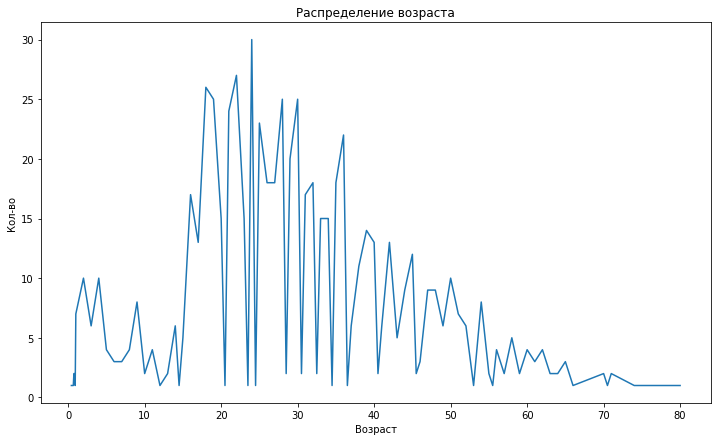

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

plt.plot(age)

plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Кол-во')


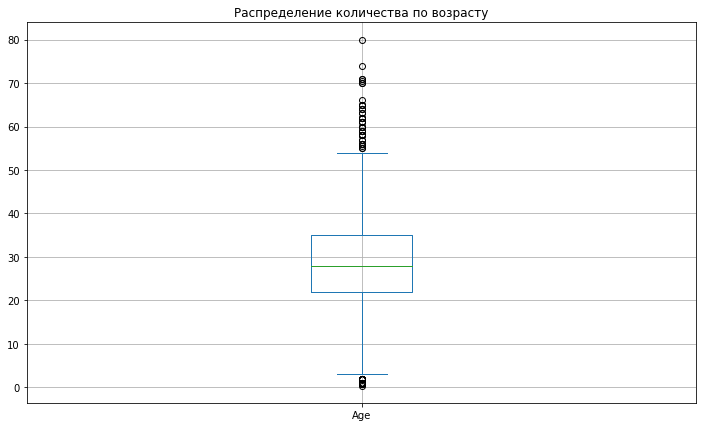

In [ ]:
titanic['Age'].plot(kind='box',
                   title='Распределение количества по возрасту', grid=True)
# Видно, что есть несколько детей до года и единицы после 75 лет, но принято решение не удалять дынные значения

In [ ]:
Pclass = data.filter(items = ['Pclass', 'Age']).groupby(['Pclass']).count().sort_values(by = 'Pclass', ascending=True) # группировка по возрасту
Pclass

,Age
Pclass,
1,186
2,173
3,355


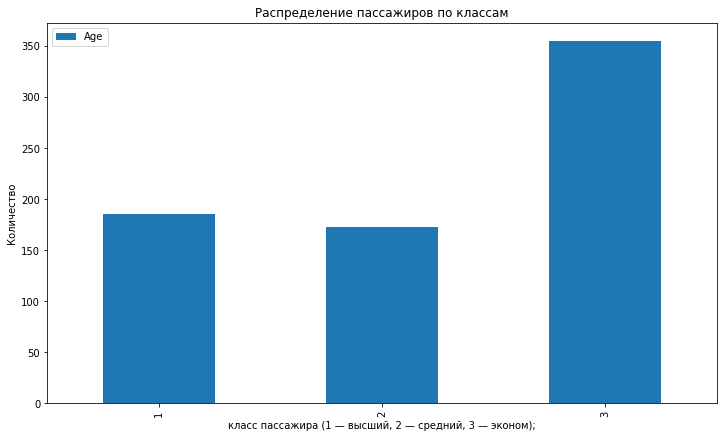

In [ ]:
Pclass.plot(kind='bar',
                     title='Распределение пассажиров по классам',
                     xlabel='класс пассажира (1 — высший, 2 — средний, 3 — эконом);',
                     ylabel='Количество')

Text(0.5, 1.0, 'Сравнение распределения по количеству братьев/сестер и по количеству родителей/детей')

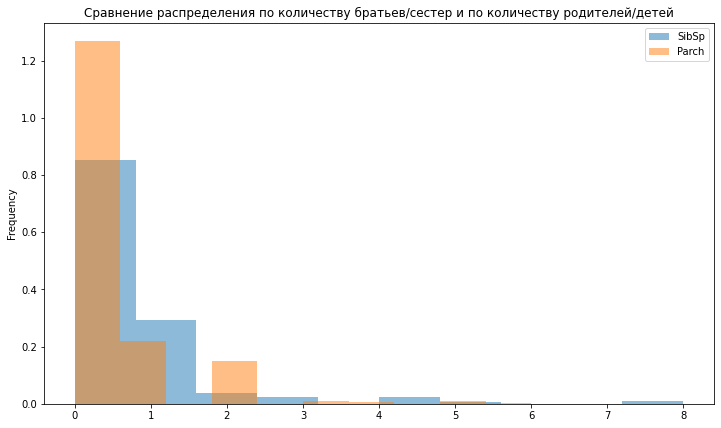

In [ ]:
# сравнение
titanic['SibSp'].plot(kind='hist',
                     alpha = 0.5,
                     bins=10,
                     density = True)


titanic['Parch'].plot(kind='hist',
                     alpha = 0.5,
                     bins=10,
                     density = True)
plt.legend(loc='upper right')
plt.title('Сравнение распределения по количеству братьев/сестер и по количеству родителей/детей')

### 9. Попробуйте математически преобразовать признак Age.

In [ ]:
# Признак Age преобразуем в категории, если возраст от 0 до 14 - ребенок (child), 14-18 - подросток (teen), 19 - 60 - взрослый (adult), 61 - 100 - пожилой (elderly)
# функция создает новый столбец с категориями Age_cat (child, teen, adult, elderly)
def age_category(row):
    if  (row['Age'] > 0) & (row['Age'] < 15):
        row['Age_cat'] = 'child'
    elif (row['Age'] > 14) and row['Age'] < 19:
        row['Age_cat'] = 'teen'
    elif row['Age'] > 18 and row['Age'] < 61:
        row['Age_cat'] = 'adult'
    elif row['Age'] > 60 and row['Age'] < 110:
        row['Age_cat']  = 'elderly'
    else: row['Age_cat']  = 110
    return row

In [ ]:
titanic = titanic.apply(age_category, axis = 1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_cat
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,adult
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,adult
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,adult
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,adult
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0,0.0,1.0,adult
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,adult
888,0.0,3.0,0.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,adult
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,adult


In [ ]:
titanic['Age_cat'].value_counts()

adult      730
child       78
teen        61
elderly     22
Name: Age_cat, dtype: int64

In [ ]:
# # закодируем значения в столбце пол ('Age_cat')
titanic = pd.get_dummies (titanic, columns = ['Age_cat'])
titanic

NameError: ignored

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    float64
 1   Pclass           891 non-null    float64
 2   Sex              891 non-null    float64
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    float64
 5   Parch            891 non-null    float64
 6   Fare             891 non-null    float64
 7   Embarked_C       891 non-null    float64
 8   Embarked_Q       891 non-null    float64
 9   Embarked_S       891 non-null    float64
 10  Age_cat_adult    891 non-null    uint8  
 11  Age_cat_child    891 non-null    uint8  
 12  Age_cat_elderly  891 non-null    uint8  
 13  Age_cat_teen     891 non-null    uint8  
dtypes: float64(10), uint8(4)
memory usage: 73.2 KB


### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_cat_adult',
       'Age_cat_child', 'Age_cat_elderly', 'Age_cat_teen'],
      dtype='object')

In [ ]:
# отбор колонок для обучения
X_2 = titanic[['Pclass', 'Sex', 'Age_cat_child', 'Age_cat_elderly', 'Age_cat_teen', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y_2 = titanic[['Survived']]

In [ ]:
X_2_train, X_2_test, y_2_train, y_2_test =  train_test_split(X_2, y_2, test_size=0.2, random_state=42) # разделение на тестовую и тренировочную выборки

In [ ]:
model_2 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
model_2.fit(X_2_train, y_2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
predictions_2 = model_2.predict(X_2_test)
predictions_2

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1.])

In [ ]:
model_2.score(X_2_train, y_2_train)

0.8019662921348315

In [ ]:
model_2.score(X_2_train, y_2_train)

0.8019662921348315

In [ ]:
roc_auc_score(y_2_test, predictions_2)

0.7866795366795367

ВЫВОД:

a) Кратко опишите какие преобразования были сделаны и почему.

Для второй модели, пропущенные данные были заменены, а не удалены.

Категориальный столбец "возраст", содержащий числительные был преобразован с разбиением по категориям.
Все отобранные категриальные столбцы были закодированы.


b) Сравните метрики моделей из п. 2 и п. 10.

Метрика стала лучше по сравнению с первой моделью

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Чем чище и структурированнее данные, тем обучение происходит с более высоким качеством. Данные нужно обязательно исследовать и нормализовывать для более повышения их качества для более эффективной работы моделей.
